In [1]:
import matplotlib.pyplot as plt  #畫圖
import numpy as np #創建數據
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('amazon.csv',encoding='iso-8859-1',parse_dates=['date'])
data.head() #當存取外部檔案時，很容易因為不同的環境而產生編碼相關的錯誤
# 常見的編碼格式：
# Unicode/UTF8：萬國碼，可支援多種語言的編碼格式
# ISO-8859-1/latin1：主要用於歐系國家的文字
# Big5：繁體中文
# GBK：簡體中文
# cp950：windows 預設的編碼

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [3]:
data.dtypes  #date  需要轉換資料型態parse_dates=['date']

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

# 1. Display Top 5 Rows of The Dataset

In [4]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


# 2. Check Last 5 Rows

In [5]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


# 3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [6]:
data.shape

(6454, 5)

In [7]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 6454
Number of Columns 5


# 4. Getting Information About Our Dataset Like Total Number Rows

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


# 5. Check For Duplicate Data and Drop Them

In [9]:
dup_data = data.duplicated().any()

In [10]:
print('Are there any duplicated value in data?',dup_data) #查看是有重複數據的

Are there any duplicated value in data? True


In [11]:
data = data.drop_duplicates()

In [12]:
data.shape

(6422, 5)

In [13]:
6454-6422 #總共刪除了32筆重複資料

32

# 6. Check Null Values In The Dataset

In [14]:
data.isnull().sum() #查看數據內沒有空值

year      0
state     0
month     0
number    0
date      0
dtype: int64

# 7. Get Overall Statistics About The Dataframe

In [15]:
data.describe(include='all',datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


# 8. Rename Month Names To English

In [18]:
data.head(1)

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,jan


In [17]:
map_dict = {'Janeiro': 'jan', 'Fevereiro': 'feb', 'Maco': 'march', 'Abril': 'april', 'Maio': 'may'
           , 'Junho': 'jun', 'Julho': 'july', 'Agosto': 'august', 'Stembro': 'sep'
           , 'Outubro': 'oct', 'Novembro': 'nov', 'Dezembro': 'dec'}
data['month_new'] = data['month'].map(map_dict)

C:\Users\USER\AppData\Local\Temp\ipykernel_20588\3622668329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new'] = data['month'].map(map_dict)


In [21]:
data['month_new'].value_counts()

august    540
oct       540
nov       540
jun       539
july      539
jan       535
feb       535
april     534
may       533
dec       513
Name: month_new, dtype: int64

# 9. Total Number of Fires Registered

In [22]:
data.shape #共6422件

(6422, 6)

# 10. In Which Month Maximum Number of Forest Fires Were Reported?

In [23]:
data['month_new'].value_counts()

august    540
oct       540
nov       540
jun       539
july      539
jan       535
feb       535
april     534
may       533
dec       513
Name: month_new, dtype: int64

In [26]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [28]:
data.groupby('month_new')['number'].sum()

month_new
april     28184.770
august    88050.435
dec       57535.480
feb       30839.050
jan       47681.844
july      92319.113
jun       55997.675
may       34725.363
nov       85508.054
oct       88681.579
Name: number, dtype: float64

In [30]:
data1 = data.groupby('month_new')['number'].sum().reset_index()
data1

,month_new,number
0,april,28184.770
1,august,88050.435
2,dec,57535.480
3,feb,30839.050
4,jan,47681.844
5,july,92319.113
6,jun,55997.675
7,may,34725.363
8,nov,85508.054
9,oct,88681.579


<AxesSubplot:xlabel='month_new', ylabel='number'>

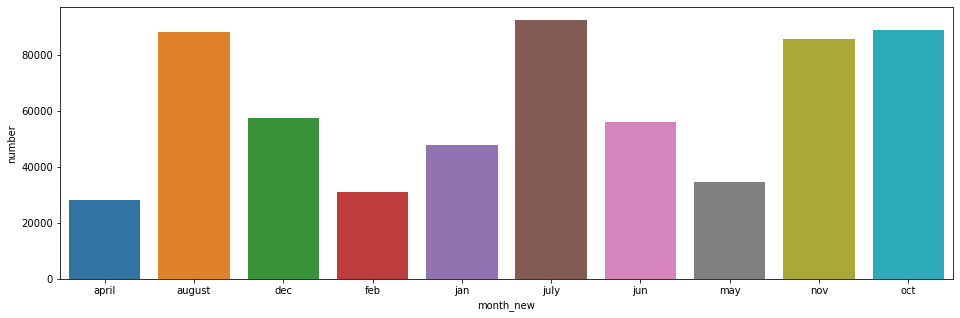

In [32]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data= data1)

# 11. In Which Year Maximum Number of Forest Fires Was Reported?#

In [33]:
data2 = data.groupby('year')['number'].sum().reset_index()
data2

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


<AxesSubplot:xlabel='year', ylabel='number'>

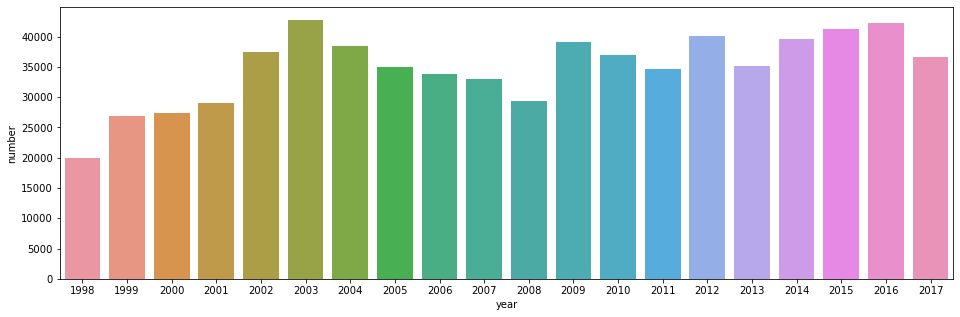

In [35]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data= data2)

# 12. In Which State Maximum Number of Forest Fires Was Reported?

In [36]:
data3 = data.groupby('state')['number'].sum().reset_index()
data3

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


<function matplotlib.pyplot.show(close=None, block=None)>

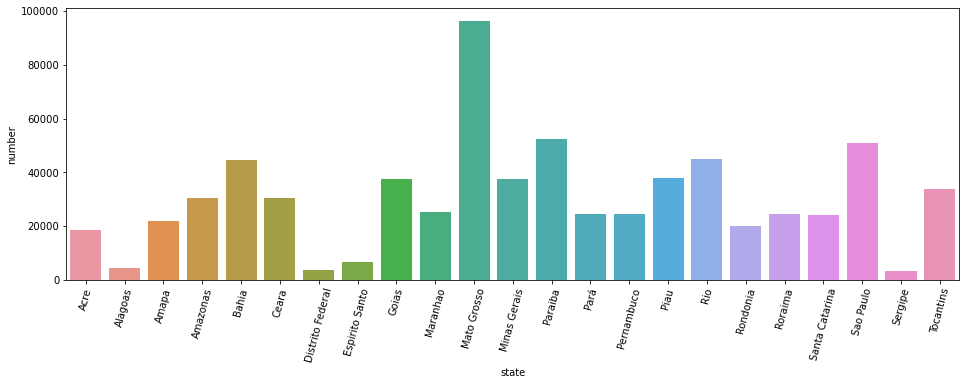

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data= data3)
plt.xticks(rotation=75)
plt.show

# 13. Find Total Number of Fires Were Reported In Amazonas

In [42]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [47]:
data[data['state'] == 'Amazonas']['number'].sum() # 共30650件

30650.129

# 14. Display Number of Fires Were Reported In Amazonas (Year-Wise)

In [48]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [54]:
data4 = data[data['state'] == 'Amazonas']
data5 =data4.groupby('year')['number'].sum().reset_index()
data5

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


<AxesSubplot:xlabel='year', ylabel='number'>

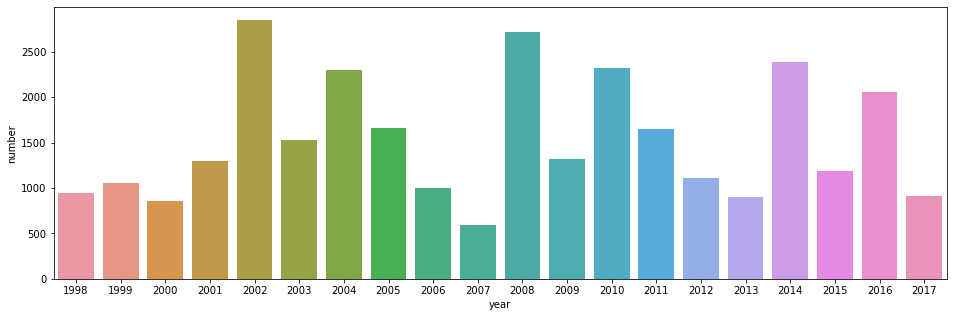

In [56]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data= data5)

# 15. Display Number of Fires Were Reported In Amazonas (Day-Wise)

In [57]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [58]:
data6 = data[data['state'] == 'Amazonas']
data6

,year,state,month,number,date,month_new
718,1998,Amazonas,Janeiro,0.0,1998-01-01,jan
719,1999,Amazonas,Janeiro,3.0,1999-01-01,jan
720,2000,Amazonas,Janeiro,7.0,2000-01-01,jan
721,2001,Amazonas,Janeiro,3.0,2001-01-01,jan
722,2002,Amazonas,Janeiro,17.0,2002-01-01,jan
...,...,...,...,...,...,...
952,2012,Amazonas,Dezembro,80.0,2012-01-01,dec
953,2013,Amazonas,Dezembro,236.0,2013-01-01,dec
954,2014,Amazonas,Dezembro,293.0,2014-01-01,dec
955,2015,Amazonas,Dezembro,565.0,2015-01-01,dec


In [74]:
day = data6.groupby(data6['date'].dt.dayofweek).sum().number

In [75]:
import calendar
day.index = [calendar.day_name[x] for x in range(0,7)]
day = day.reset_index()
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


<AxesSubplot:xlabel='index', ylabel='number'>

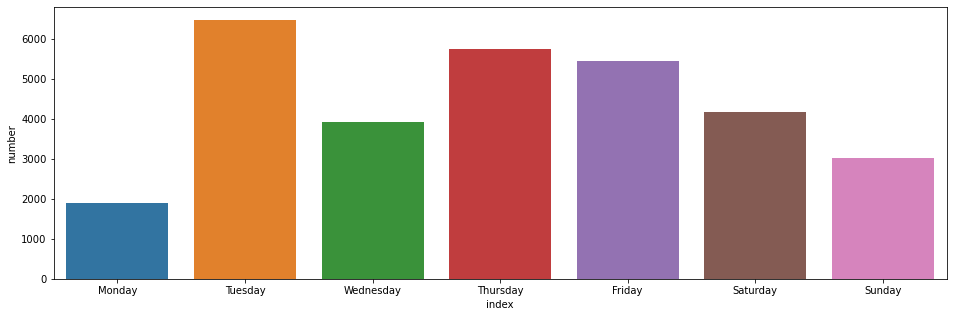

In [77]:
plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data = day)

# 16. Find Total Number of Fires  Were Reported In 2015 And Visualize Data Based on Each ‘Month’#

In [78]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [80]:
fire = data[data['year'] ==2015].groupby('month_new')['number'].sum()

month_new
april     2573.000
august    4363.125
dec       4088.522
feb       2309.000
jan       4635.000
july      4364.392
jun       3260.552
may       2384.000
nov       4034.518
oct       4499.525
Name: number, dtype: float64

In [86]:
fire = data[data['year'] ==2015].groupby('month_new')['number'].sum().reset_index()#轉換index方便做報表
fire

,month_new,number
0,april,2573.000
1,august,4363.125
2,dec,4088.522
3,feb,2309.000
4,jan,4635.000
5,july,4364.392
6,jun,3260.552
7,may,2384.000
8,nov,4034.518
9,oct,4499.525


<AxesSubplot:xlabel='month_new', ylabel='number'>

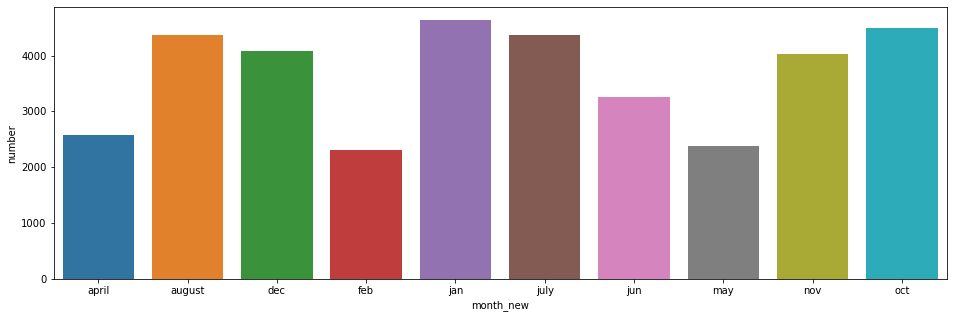

In [85]:
plt.figure(figsize=(16,5))
sns.barplot(x='month_new',y='number',data = fire)

# 17. Find Average Number of Fires Were Reported From Highest to Lowest (State-Wise)

In [87]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [104]:
data8 =data.groupby('state')['number'].mean().sort_values(ascending = False).reset_index()#轉換index方便做報表
data8

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


<function matplotlib.pyplot.show(close=None, block=None)>

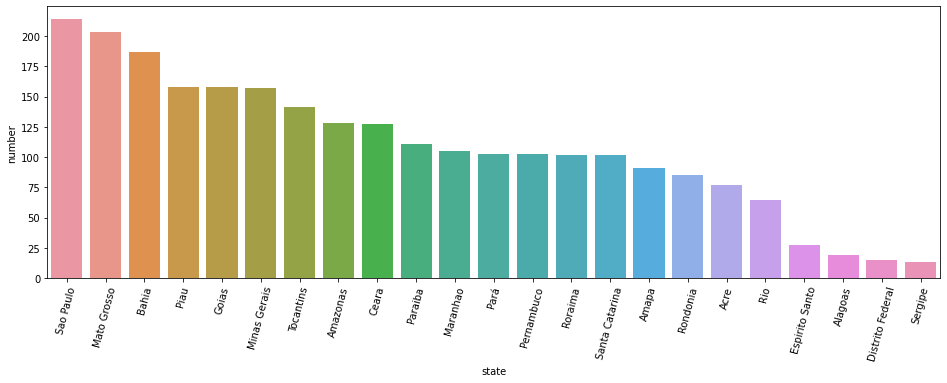

In [108]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data = data8)
plt.xticks(rotation = 75)
plt.show

# 18.  To Find The State Names Where Fires Were Reported In 'dec' Month

In [109]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [112]:
data[data['month_new'] == 'dec']['state'].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Pará', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)